In [17]:
import pandas as pd

# Load the dataset
df = pd.read_csv('RTA dataset.csv')



In [18]:
# Display the first few rows and basic info
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [19]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [20]:
# Drop irrelevant columns and handle missing values
# Drop irrelevant columns and handle missing values
relevant_columns = ['Day_of_week', 'Time', 'Road_surface_conditions', 'Weather_conditions', 'Accident_severity']
df = df[relevant_columns].dropna()


In [21]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Day_of_week              12316 non-null  object
 1   Time                     12316 non-null  object
 2   Road_surface_conditions  12316 non-null  object
 3   Weather_conditions       12316 non-null  object
 4   Accident_severity        12316 non-null  object
dtypes: object(5)
memory usage: 481.2+ KB
None


In [22]:
# Summary statistics and insights
print(df.describe())

       Day_of_week      Time Road_surface_conditions Weather_conditions  \
count        12316     12316                   12316              12316   
unique           7      1074                       4                  9   
top         Friday  15:30:00                     Dry             Normal   
freq          2041       120                    9340              10063   

       Accident_severity  
count              12316  
unique                 3  
top        Slight Injury  
freq               10415  


In [23]:
# Count occurrences of road conditions and weather conditions
road_condition_counts = df['Road_surface_conditions'].value_counts()
weather_counts = df['Weather_conditions'].value_counts()

print("\nRoad Condition Counts:")
print(road_condition_counts)
print("\nWeather Condition Counts:")
print(weather_counts)


Road Condition Counts:
Road_surface_conditions
Dry                     9340
Wet or damp             2904
Snow                      70
Flood over 3cm. deep       2
Name: count, dtype: int64

Weather Condition Counts:
Weather_conditions
Normal               10063
Raining               1331
Other                  296
Unknown                292
Cloudy                 125
Windy                   98
Snow                    61
Raining and Windy       40
Fog or mist             10
Name: count, dtype: int64


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

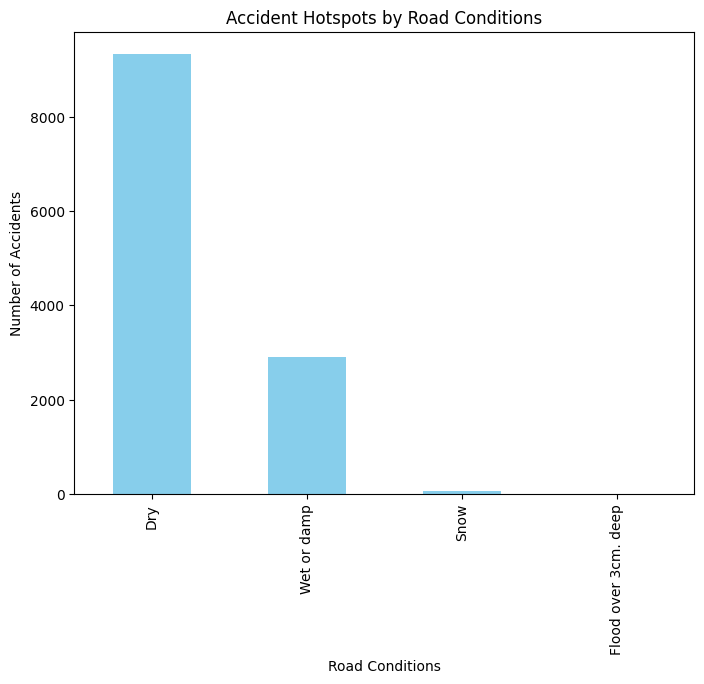

In [25]:
# Plot accident hotspots by road conditions
plt.figure(figsize=(8, 6))
road_condition_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Road Conditions')
plt.ylabel('Number of Accidents')
plt.title('Accident Hotspots by Road Conditions')
plt.show()

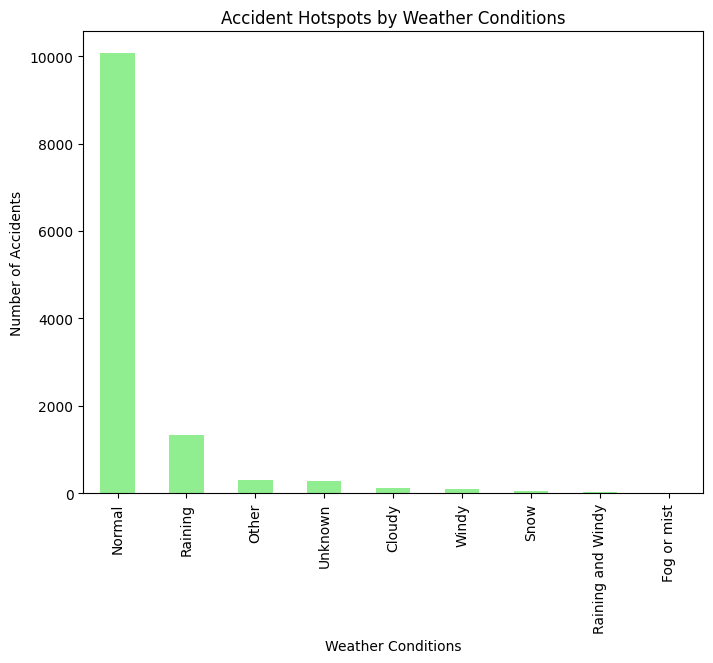

In [26]:
# Plot accident hotspots by weather conditions
plt.figure(figsize=(8, 6))
weather_counts.plot(kind='bar', color='lightgreen')
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Accidents')
plt.title('Accident Hotspots by Weather Conditions')
plt.show()

In [27]:

# Count occurrences of accident severity
severity_counts = df['Accident_severity'].value_counts()

In [28]:
severity_counts

Accident_severity
Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: count, dtype: int64

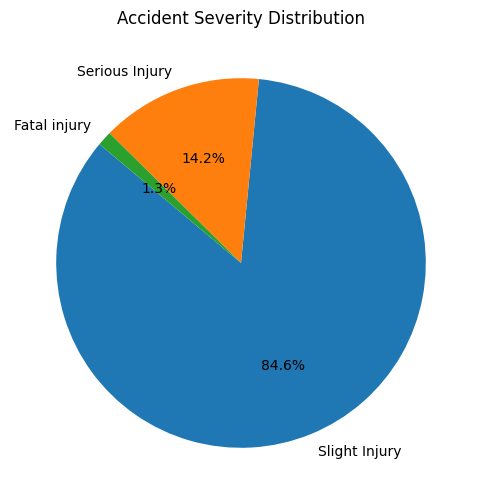

In [29]:
# Plot pie chart for accident severity distribution
plt.figure(figsize=(8, 6))
plt.pie(severity_counts, labels=severity_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Accident Severity Distribution')
plt.show()